In [1]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
# !apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
# !wget http://www.atarimania.com/roms/Roms.rar
# !unrar x Roms.rar > /dev/null 2>&1
# !python -m atari_py.import_roms . /dev/null 2>&1

# Algoritmo de iteración de valores
Algoritmo para la resolución de Problemas de decisión de Markov (MDP)

Cada estado correspondería a una ecuación de Bellman:

$$V(s) =\underset{a \in A}{\max} \sum_{s'}P(s'|s,a)\left[ R(s,a,s')+\gamma  V(s') \right]$$

$$V(s) = \underset{a'}{\max}Q(s,a)$$

$$Q(s,a) = \sum_{s'}P(s'|s,a)\left[ R(s,a,s')+\gamma \underset{a'}{\max} Q(s',a') \right]$$


Bellman update:

$$V_{t+1}(s) \leftarrow \underset{a \in A}{\max} \sum_{s'}P(s'|s,a)\left[ R(s,a,s')+\gamma  V_t(s') \right]$$

Algoritmo:
1. Inicializar variables a un valor inicial.
1. Realizar Bellman Update para cada estado.
1. Repetir para un número determinado de iteraciones o hasta que los cambios $\delta < \epsilon$ siendo $\epsilon$ un número pequeño. 





In [2]:
import collections
import numpy as np
import matplotlib.pyplot as plt
import gym

# Introducción a GYM
Creamos e iniciamos el entorno. En este caso es FrozenLake.

In [3]:
ENV_NAME = "FrozenLake-v0"
env = gym.make(ENV_NAME)
obs = env.reset()
print("Estado actual: ",obs)

Estado actual:  0


Vemos las acciones disponibles así como los estados

In [4]:
env.action_space, env.observation_space

(Discrete(4), Discrete(16))

Ejecutamos una acción. Nos devolverá una tupla con (Observación, Recompensa, Fin, Info Extra)

In [5]:
result = env.step(env.action_space.sample())
print(result)

(4, 0.0, False, {'prob': 0.3333333333333333})


Ejecutamos un episodio completo


In [6]:
env = gym.make(ENV_NAME)
env.reset()
while True:
  obs, reward, done, _ = env.step(env.action_space.sample())
  print(obs, reward)
  env.render()
  if done:
    print("Completado")
    break

1 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
1 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
2 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
6 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
10 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
11 0.0
  (Up)
SFFF
FHFH
FFFH
HFFG
Completado


In [7]:
class V_Agent:
      def __init__(self, gamma, env):
        self.gamma = gamma
        self.env = env
        self.rewards = collections.defaultdict(float) #Almacenamos las recompensas R(s,a,s')
        self.trans = collections.defaultdict(lambda :collections.defaultdict(int)) #Almacenamos el numero de veces que pasamos de un estado a otro P(s,a,s')
        self.values = collections.defaultdict(float) #Valores de los estados

      def add_step(self, state, action, next_state, reward):
        self.rewards[(state, action, next_state)] = reward
        self.trans[(state, action)][next_state] += 1

      def update_values(self): #Value iteration
        for state in range(self.env.observation_space.n):
          state_action_values = []
          for action in range(self.env.action_space.n):
            action_value = 0.0
            total = sum(self.trans[(state,action)].values())
            for next_state, count in self.trans[(state,action)].items():
              rw = self.rewards[(state,action, next_state)]
              state_action_value = (count/total) * (rw + self.gamma * self.values[next_state])
              action_value += state_action_value
            state_action_values.append(action_value)
          self.values[state] = max(state_action_values)


      def select_action(self, state):
        state_action_values = []
        for action in range(self.env.action_space.n):
          action_value = 0.0
          total = sum(self.trans[(state,action)].values()) 
          for next_state, count in self.trans[(state,action)].items():
            rw = self.rewards[(state,action, next_state)]
            state_action_value = (count/total) * (rw + self.gamma * self.values[next_state])
            action_value += state_action_value
          state_action_values.append(action_value)
        return np.argmax(state_action_values)

Nueva recompensa 0 -> 0.08333333333333333
Nueva recompensa 0.08333333333333333 -> 0.14285714285714285
Nueva recompensa 0.14285714285714285 -> 0.17647058823529413
Nueva recompensa 0.17647058823529413 -> 0.2222222222222222
Nueva recompensa 0.2222222222222222 -> 0.25
Nueva recompensa 0.25 -> 0.3
Nueva recompensa 0.3 -> 0.35
Nueva recompensa 0.35 -> 0.4
Nueva recompensa 0.4 -> 0.45
Nueva recompensa 0.45 -> 0.5
Nueva recompensa 0.5 -> 0.55
Nueva recompensa 0.55 -> 0.6
Nueva recompensa 0.6 -> 0.65
Nueva recompensa 0.65 -> 0.7
Nueva recompensa 0.7 -> 0.75
Nueva recompensa 0.75 -> 0.8
Nueva recompensa 0.8 -> 0.85
Completado 0.85 Total episodios:  85


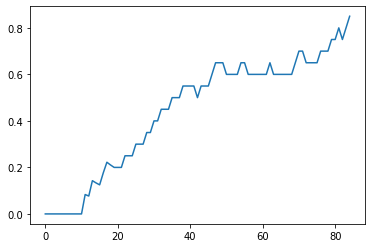

In [8]:
ENV_NAME = "FrozenLake-v0" #FrozenLake8x8-v0
GAMMA = 0.9

env = gym.make(ENV_NAME)
obs = env.reset()
agent = V_Agent(GAMMA, env)

total_rewards = collections.deque(maxlen=20)
total_episodes = 0
episode_rewards = 0

reward_means = []
best_reward = 0

while True:

  if total_episodes % 20 == 0:
    for _ in range(200):
        action = env.action_space.sample()
        new_obs, reward, done, _ = env.step(action)
        agent.add_step(obs, action, new_obs, reward)
        obs = env.reset() if done else new_obs
        


  action = agent.select_action(obs)
  new_obs, reward, done, _ = env.step(action)
  agent.add_step(obs, action, new_obs, reward)
  obs = new_obs
  episode_rewards += reward
  if done:
    agent.update_values()
    total_episodes += 1
    total_rewards.append(episode_rewards)
    episode_rewards = 0
    rw = np.mean(total_rewards)
    reward_means.append(rw)
    if rw > best_reward:
      print("Nueva recompensa {} -> {}".format(best_reward, rw))
      best_reward = rw
    if rw > 0.8:
      print("Completado", rw,"Total episodios: ", total_episodes)
      break

    obs = env.reset()

fig, ax = plt.subplots()
ax.plot(reward_means)
plt.show()

In [9]:
env = gym.make(ENV_NAME)
env.reset()
while True:
  action = agent.select_action(obs)
  obs, reward, done, _ = env.step(action)
  env.render()
  if done:
    print("Completado", reward)
    break
  print("############")

  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Up)
SFFF
FHFH
FFFH
HFFG
############
  (Up)
SFFF
FHFH
FFFH
HFFG
############
  (Down)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Down)
SFFF
FHFH
FFFH
HFFG
############
  (Up)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Up)
SFFF
FHFH
FFFH
HFFG
############
  (Up)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (Up)
SFFF
FHFH
FFFH
HFFG
############
  (Left)
SFFF
FHFH
FFFH
HFFG
############
  (L

In [10]:
class Q_Agent:
      def __init__(self, gamma, env):
        self.gamma = gamma
        self.env = env
        self.rewards = collections.defaultdict(float) #Almacenamos las recompensas R(s,a,s')
        self.trans = collections.defaultdict(lambda :collections.defaultdict(int)) #Almacenamos el numero de veces que pasamos de un estado a otro P(s,a,s')
        self.values = collections.defaultdict(float) #Valores de los estados

      def add_step(self, state, action, next_state, reward):
        self.rewards[(state, action, next_state)] = reward
        self.trans[(state, action)][next_state] += 1

      def update_values(self): #Value iteration con Q-valores
        for state in range(self.env.observation_space.n):
          for action in range(self.env.action_space.n):
            action_value = 0.0
            total = sum(self.trans[(state,action)].values())
            for next_state, count in self.trans[(state,action)].items():
              rw = self.rewards[(state,action, next_state)]
              best_action = self.select_action(next_state)
              state_action_value = (count/total) * (rw + self.gamma * self.values[(next_state, best_action)])
              action_value += state_action_value
            self.values[(state, action)] = action_value


      def select_action(self, state):
        state_action_values = []
        for action in range(self.env.action_space.n):
          action_value = self.values[(state, action)]
          state_action_values.append(action_value)
        return np.argmax(state_action_values)


Completado 0.85 Total episodios:  351


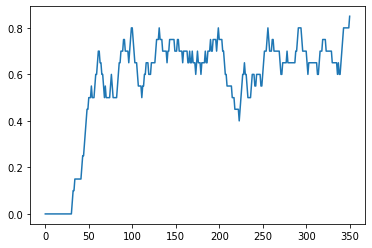

In [11]:
ENV_NAME = "FrozenLake-v0" #FrozenLake8x8-v0
GAMMA = 0.9

env = gym.make(ENV_NAME)
obs = env.reset()
agent = Q_Agent(GAMMA, env)

total_rewards = collections.deque(maxlen=20)
total_episodes = 0
episode_rewards = 0

reward_means = []

while True:

  if total_episodes % 20 == 0:
    for _ in range(200):
        action = env.action_space.sample()
        new_obs, reward, done, _ = env.step(action)
        agent.add_step(obs, action, new_obs, reward)
        obs = env.reset() if done else new_obs
        


  action = agent.select_action(obs)
  new_obs, reward, done, _ = env.step(action)
  agent.add_step(obs, action, new_obs, reward)
  obs = new_obs
  episode_rewards += reward

  if done:
    agent.update_values()
    total_episodes += 1
    total_rewards.append(episode_rewards)
    episode_rewards = 0
    rw = np.mean(total_rewards)
    reward_means.append(rw)
    if rw > 0.8:
      print("Completado", rw,"Total episodios: ", total_episodes)
      break

    obs = env.reset()

fig, ax = plt.subplots()
ax.plot(reward_means)
plt.show()